In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [132]:
dir_path = "../result/1st_5folds/"
file_len = 0
result = []

for (root, directories, files) in os.walk(dir_path):
    files = sorted(files)
    for file in files:
        if '.csv' in file and 'avg' not in file:
            print(file)
            file_len += 1
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            result.append(df.target)
print('Total files: ', file_len)

output_1.csv
output_2.csv
output_3.csv
output_4.csv
output_5.csv
Total files:  5


In [119]:
result.pop(3)

0       2.634698
1       3.884294
2       1.711209
3       0.369438
4       4.138547
          ...   
1095    1.871361
1096    3.371114
1097    3.752692
1098    3.868431
1099    4.965093
Name: target, Length: 1100, dtype: float64

In [120]:
result

[0       3.872871
 1       4.670954
 2       1.399651
 3       0.165729
 4       4.271357
           ...   
 1095    2.245760
 1096    4.267333
 1097    3.322920
 1098    3.728273
 1099    5.385481
 Name: target, Length: 1100, dtype: float64,
 0       3.643579
 1       4.403439
 2       1.378532
 3       0.425174
 4       4.071348
           ...   
 1095    2.154092
 1096    4.325007
 1097    3.327340
 1098    3.911379
 1099    5.244102
 Name: target, Length: 1100, dtype: float64,
 0       3.865230
 1       4.742878
 2       1.243399
 3       0.017606
 4       4.183445
           ...   
 1095    2.254747
 1096    4.152804
 1097    2.814102
 1098    3.920727
 1099    5.169919
 Name: target, Length: 1100, dtype: float64,
 0       3.435587
 1       4.379988
 2       1.500173
 3       0.005632
 4       4.173211
           ...   
 1095    1.984159
 1096    4.118006
 1097    3.173175
 1098    3.968372
 1099    5.139328
 Name: target, Length: 1100, dtype: float64]

In [133]:
avg_result = np.sum(result, axis=0) / len(result)
print(avg_result)
print(len(avg_result))

[3.49039288 4.41631055 1.44659276 ... 3.27804594 3.87943645 5.18078442]
1100


In [122]:
submit = pd.read_csv('../sample/sample_submission.csv')
print(submit.head())
print(len(submit))

                          id  target
0  boostcamp-sts-v1-test-000     3.5
1  boostcamp-sts-v1-test-001     2.1
2  boostcamp-sts-v1-test-002     2.3
3  boostcamp-sts-v1-test-003     1.0
4  boostcamp-sts-v1-test-004     4.0
1100


In [123]:
submit.target = avg_result
submit.head()

,id,target
0,boostcamp-sts-v1-test-000,3.704317
1,boostcamp-sts-v1-test-001,4.549315
2,boostcamp-sts-v1-test-002,1.380439
3,boostcamp-sts-v1-test-003,0.153535
4,boostcamp-sts-v1-test-004,4.174840


In [124]:
submit.to_csv('avg_result_except4.csv', index=0)

In [102]:
len(result)

5

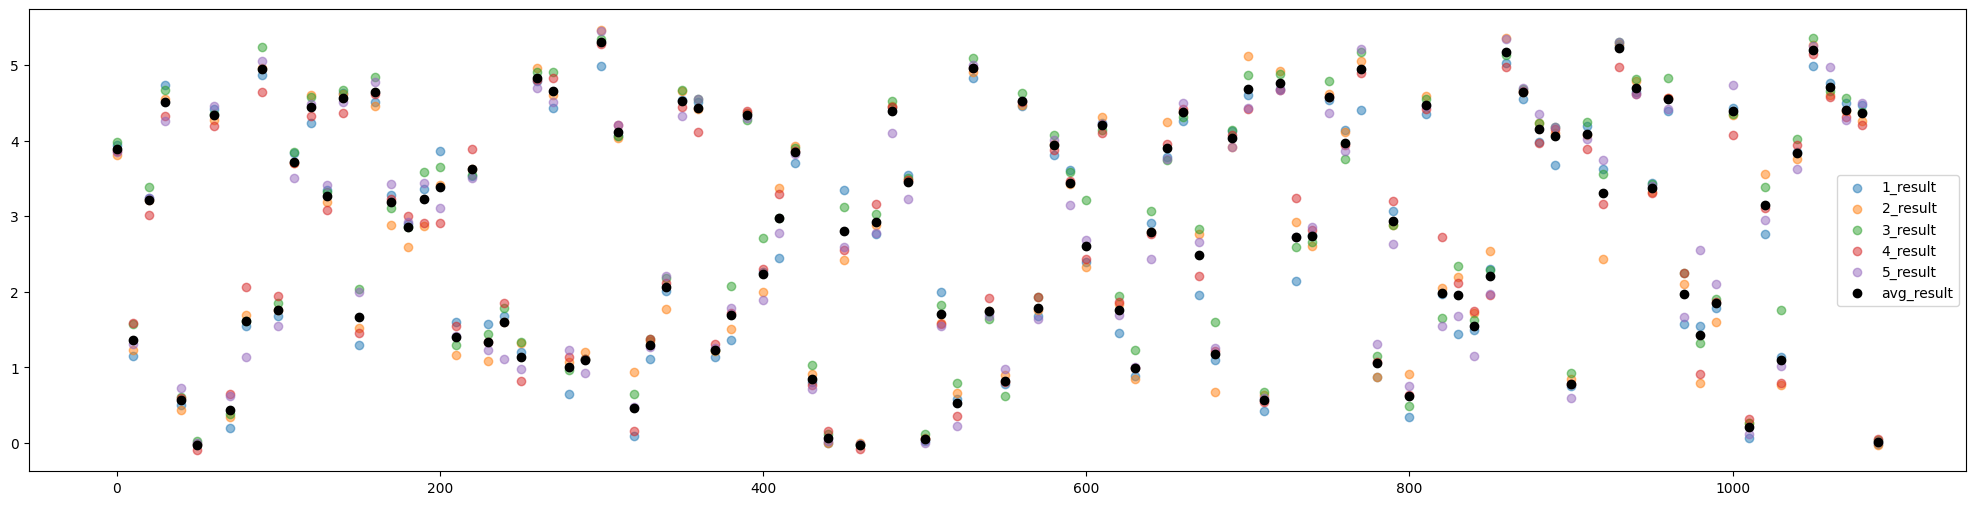

In [104]:
plt.figure(figsize=(25, 6))
interval = 10

for i in range(file_len):
    # if i == 3:
    #     plt.scatter(x=range(0, 1100)[::interval], y=result[i][::interval], label=f'{i+1}_result', alpha=1, color='red')
    # else:
    plt.scatter(x=range(0, 1100)[::interval], y=result[i][::interval], label=f'{i+1}_result', alpha=0.5)
plt.scatter(x=range(0, 1100)[::interval], y=avg_result[::interval], label=f'avg_result', alpha=1, color='black')
plt.legend()
plt.show()

In [74]:
std = []
for i in range(len(result)):
    std.append(np.std([x[i] for x in result]))
sum(std) / len(result)

0.21168837863330714

In [90]:
temp = result

In [92]:
temp.pop(3)

0       2.634698
1       3.884294
2       1.711209
3       0.369438
4       4.138547
          ...   
1095    1.871361
1096    3.371114
1097    3.752692
1098    3.868431
1099    4.965093
Name: target, Length: 1100, dtype: float64

In [94]:
std = []
for i in range(len(temp)):
    std.append(np.std([x[i] for x in temp]))
sum(std) / len(temp)

0.15020245172257177

In [131]:
kk = pd.read_csv('./1st_5folds/avg_result.csv')
kk

,id,target
0,boostcamp-sts-v1-test-000,3.704317
1,boostcamp-sts-v1-test-001,4.549315
2,boostcamp-sts-v1-test-002,1.380439
3,boostcamp-sts-v1-test-003,0.153535
4,boostcamp-sts-v1-test-004,4.174840
...,...,...
1095,boostcamp-sts-v1-test-1095,2.159690
1096,boostcamp-sts-v1-test-1096,4.215788
1097,boostcamp-sts-v1-test-1097,3.159384
1098,boostcamp-sts-v1-test-1098,3.882188


In [128]:
first_avg = pd.read_csv('./1st_5folds/avg_result_except4.csv')
second_avg = pd.read_csv('./2nd_5folds/avg_result.csv')

In [129]:
first_avg

,id,target
0,boostcamp-sts-v1-test-000,3.704317
1,boostcamp-sts-v1-test-001,4.549315
2,boostcamp-sts-v1-test-002,1.380439
3,boostcamp-sts-v1-test-003,0.153535
4,boostcamp-sts-v1-test-004,4.174840
...,...,...
1095,boostcamp-sts-v1-test-1095,2.159690
1096,boostcamp-sts-v1-test-1096,4.215788
1097,boostcamp-sts-v1-test-1097,3.159384
1098,boostcamp-sts-v1-test-1098,3.882188


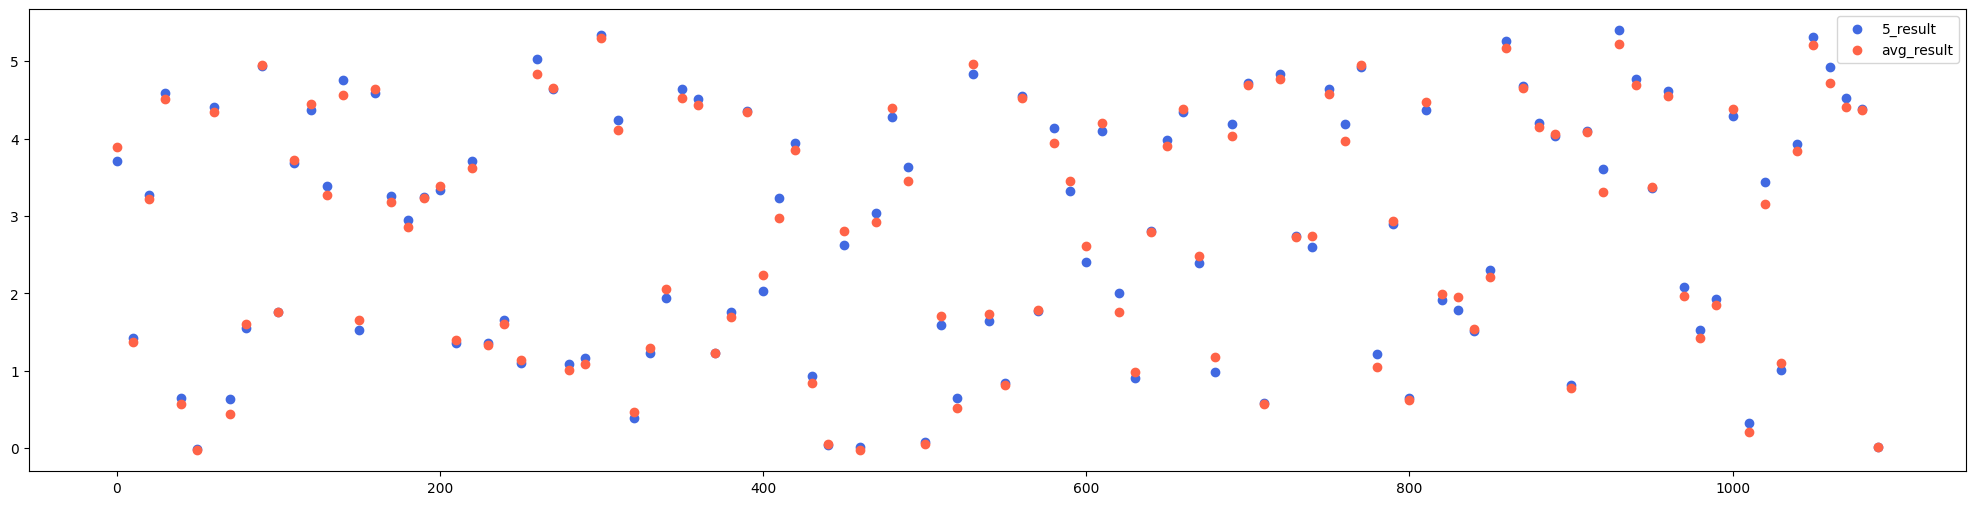

In [134]:
plt.figure(figsize=(25, 6))
interval = 10

plt.scatter(x=range(0, 1100)[::interval], y=first_avg.target[::interval], label=f'{i+1}_result', alpha=1, color='royalblue')
plt.scatter(x=range(0, 1100)[::interval], y=second_avg.target[::interval], label=f'avg_result', alpha=1, color='tomato')
plt.legend()
plt.show()

In [135]:
avg = (first_avg.target + second_avg.target) / 2
avg

0       3.798419
1       4.533183
2       1.604733
3       0.181570
4       4.210326
          ...   
1095    2.106011
1096    4.251575
1097    3.219993
1098    3.901397
1099    5.206229
Name: target, Length: 1100, dtype: float64

In [136]:
submit.target = avg
submit.head()

,id,target
0,boostcamp-sts-v1-test-000,3.798419
1,boostcamp-sts-v1-test-001,4.533183
2,boostcamp-sts-v1-test-002,1.604733
3,boostcamp-sts-v1-test-003,0.181570
4,boostcamp-sts-v1-test-004,4.210326


In [137]:
submit.to_csv('avg_result.csv', index=0)